In [72]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [30]:
# read data
df = pd.read_csv('dielectron.csv')
df.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [32]:
# check null values
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [33]:
# delete null values
df = df.dropna(axis=0)
df.isnull().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [34]:
# check for duplicates
df.duplicated().sum()

23

In [35]:
# delete duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [36]:
# generate data
features = df.drop(['M', 'pt1', 'pt2', 'E1', 'E2','Q1', 'Q2', 'phi1', 'phi2', 'eta1', 'eta2'], axis=1).to_numpy()
labels = df.M.to_numpy()

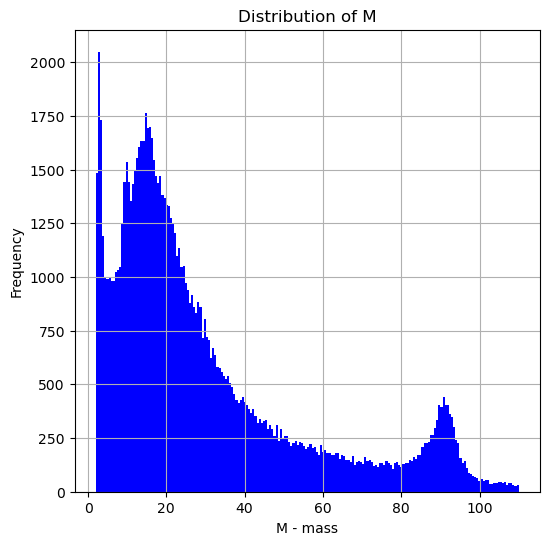

In [37]:
# plot distribution of mass
plt.figure(figsize=(6,6))
df.M.plot(kind='hist', bins=200, color='blue')
plt.title('Distribution of M')
plt.xlabel('M - mass')
plt.grid()
plt.show()

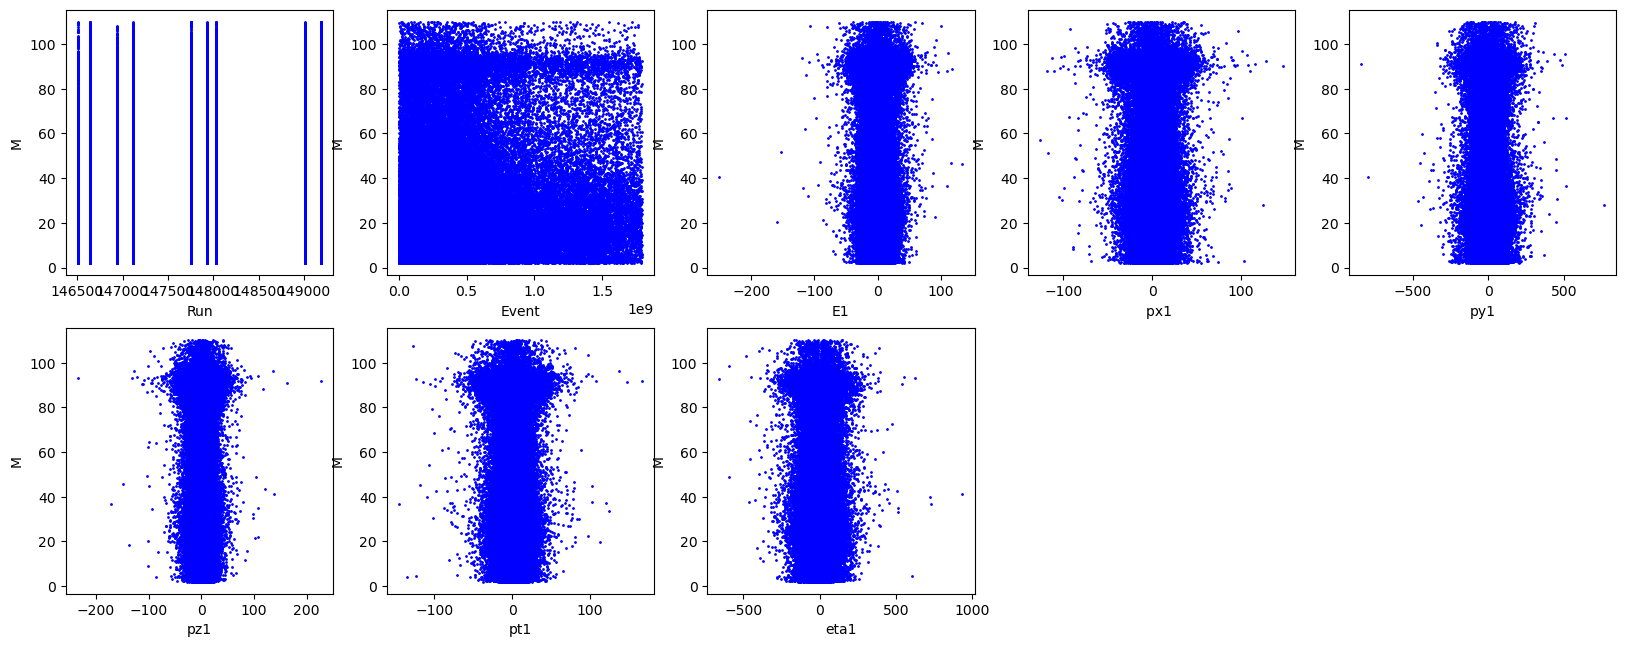

In [38]:
#create a scatte plot between M and each feature
plt.figure(figsize=(20,20))
for i in range(0, features.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.scatter(features[:,i], labels, color='blue', s=1)
    plt.xlabel(df.columns[i])
    plt.ylabel('M')
plt.show()


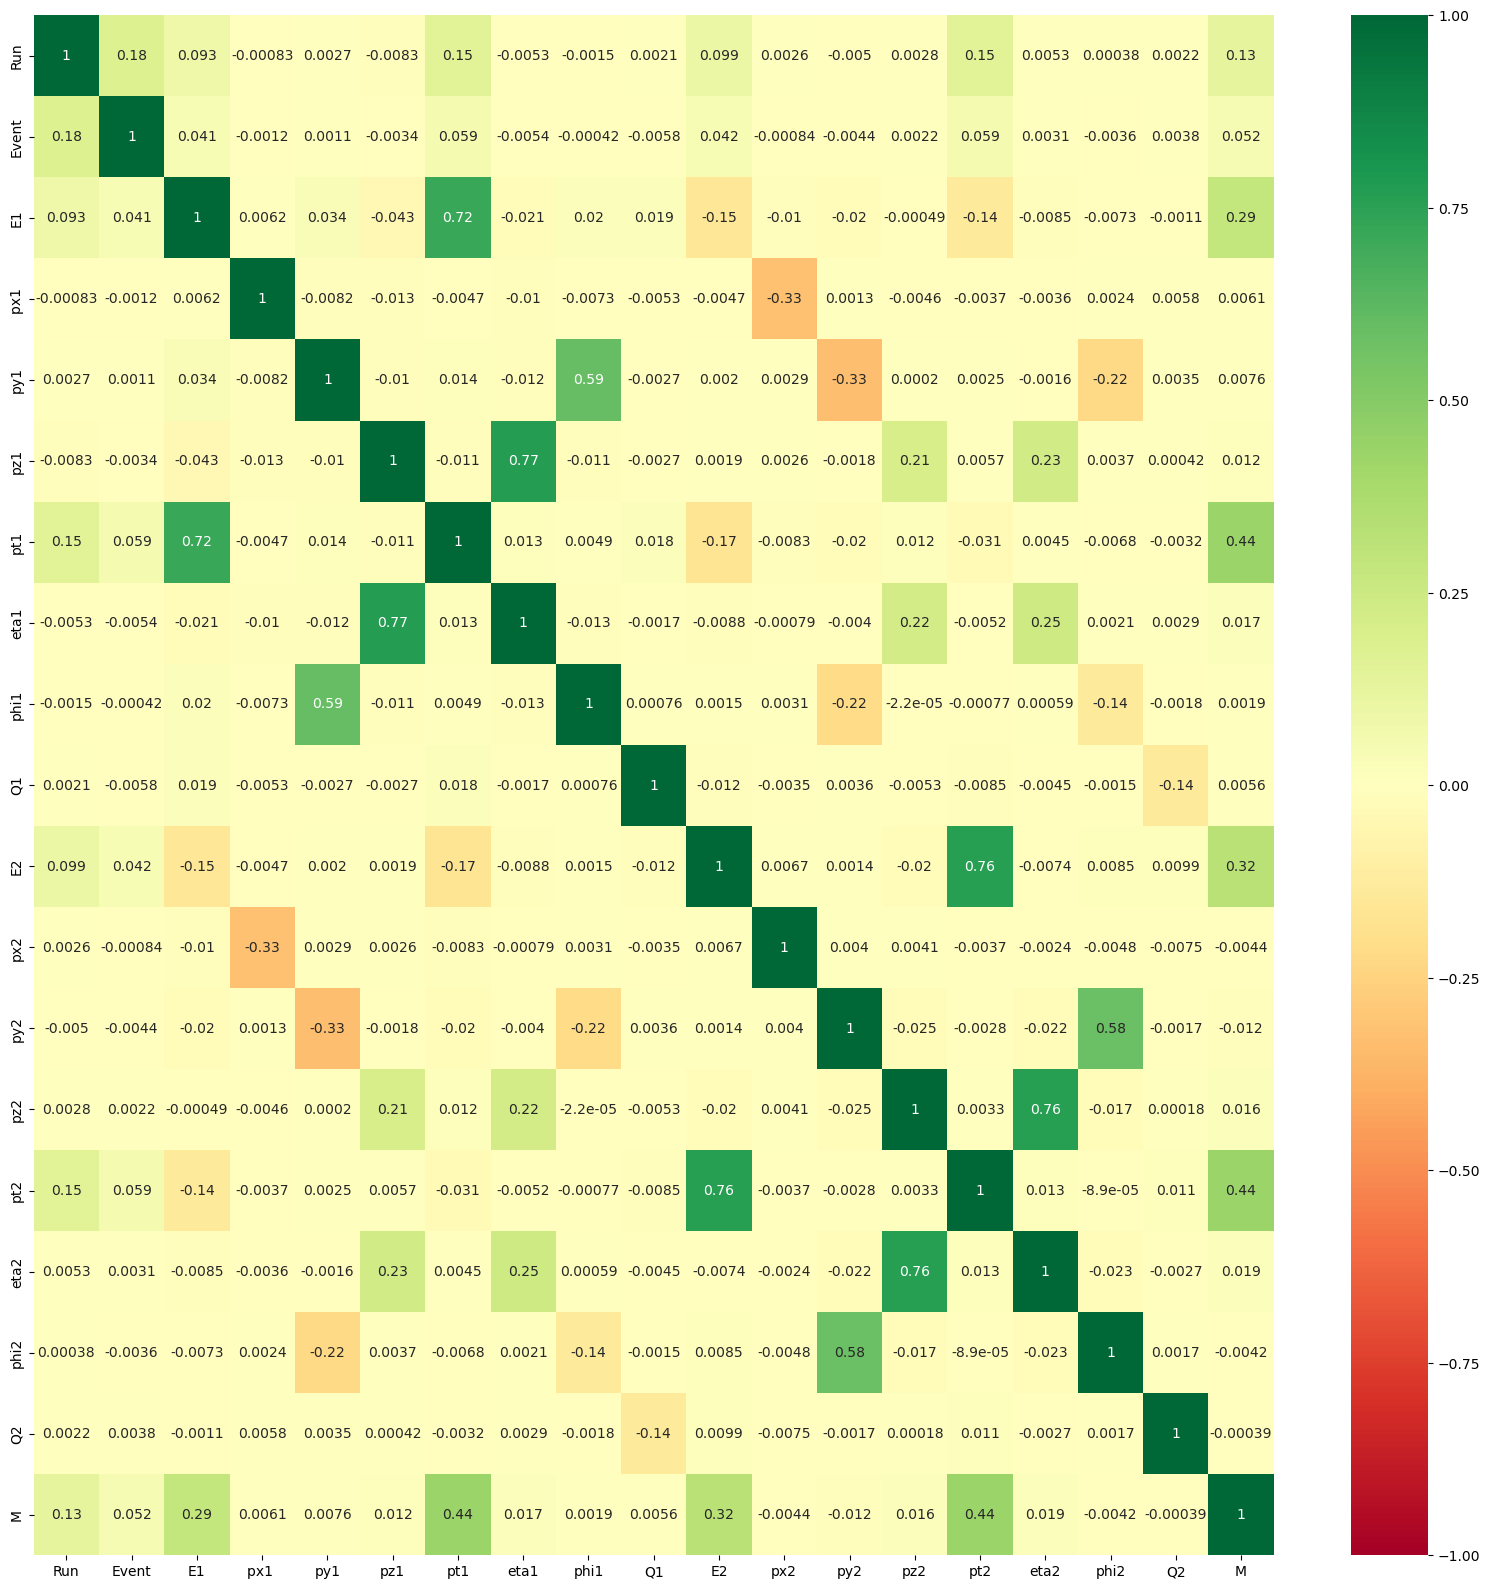

In [39]:
# plot a correlation matrix
corr = df.corr()
fig = plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True, cmap='RdYlGn',vmin=-1, vmax=1)
plt.show()

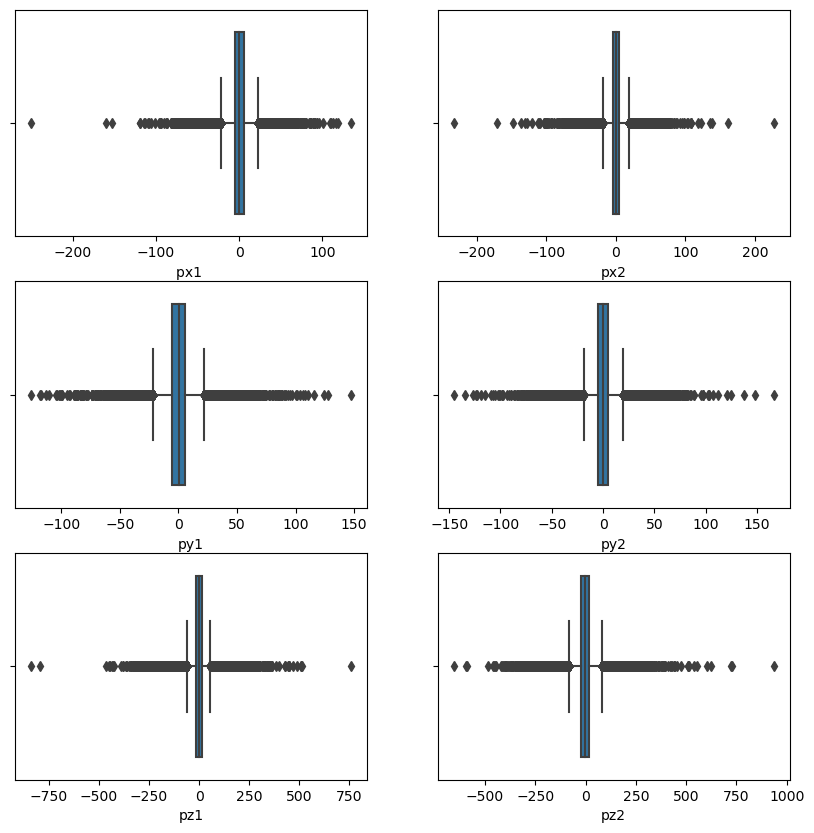

In [40]:
#detect outliers for px1,px2,py1,py2,pz1,pz2 us boxplot
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(x=df['px1 '])
plt.subplot(3,2,2)
sns.boxplot(x=df['px2'])
plt.subplot(3,2,3)
sns.boxplot(x=df['py1'])
plt.subplot(3,2,4)
sns.boxplot(x=df['py2'])
plt.subplot(3,2,5)
sns.boxplot(x=df['pz1'])
plt.subplot(3,2,6)
sns.boxplot(x=df['pz2'])
plt.show()

In [41]:
# drop features
features = df.drop(['M', 'pt1', 'pt2', 'E1', 'E2','Q1', 'Q2', 'phi1', 'phi2', 'eta1', 'eta2'], axis=1).to_numpy()

In [42]:
# split data into train, test and validation sets
X_train, X, y_train, y = train_test_split(features, labels, test_size=0.2,train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X,y,test_size = 0.5,train_size =0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((79913, 8), (79913,), (9990, 8), (9990,), (9989, 8), (9989,))

In [43]:
# standardize data
X_test_std = StandardScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_val_std = StandardScaler().fit_transform(X_val)

np.allclose(X_train.mean(axis=0), np.zeros(X_train.shape[1])),\
    np.allclose(X_train_std.mean(axis=0),np.zeros(X_train_std.shape[1])),\
        np.allclose(X_train.std(axis=0), np.ones(X_train.shape[1])),\
            np.allclose(X_train_std.std(axis=0), np.ones(X_train_std.shape[1]))

(False, True, False, True)

In [44]:
# hyperparameter tuning random forest regression
params = {'n_estimators': [80, 100, 120], 'max_features': ['sqrt', 'log2', None]}

grid = GridSearchCV(RandomForestRegressor(), params, verbose=3, n_jobs=4).fit(X_train_std, y_train)
grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_features=sqrt, n_estimators=80;, score=0.957 total time=  15.5s
[CV 2/5] END max_features=sqrt, n_estimators=80;, score=0.956 total time=  15.5s
[CV 3/5] END max_features=sqrt, n_estimators=80;, score=0.956 total time=  15.6s
[CV 4/5] END max_features=sqrt, n_estimators=80;, score=0.956 total time=  15.6s
[CV 5/5] END max_features=sqrt, n_estimators=80;, score=0.955 total time=  15.3s
[CV 1/5] END max_features=sqrt, n_estimators=100;, score=0.960 total time=  19.2s
[CV 2/5] END max_features=sqrt, n_estimators=100;, score=0.958 total time=  19.2s
[CV 3/5] END max_features=sqrt, n_estimators=100;, score=0.956 total time=  19.2s
[CV 4/5] END max_features=sqrt, n_estimators=100;, score=0.958 total time=  19.2s
[CV 5/5] END max_features=sqrt, n_estimators=100;, score=0.956 total time=  19.2s
[CV 1/5] END max_features=sqrt, n_estimators=120;, score=0.959 total time=  23.2s
[CV 2/5] END max_features=sqrt, n_estimator

{'max_features': None, 'n_estimators': 100}

In [63]:
# hyperparameter tuning MLP
params = {'hidden_layer_sizes': [50, 100, 200], 'activation': ['identity', 'relu'], 'solver': ['lbfgs','sgd','adam'], 'max_iter': [100, 200,500]}

grid = GridSearchCV(MLPRegressor(), params, verbose=3, n_jobs=4).fit(X_val_std, y_val)
grid.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[CV 1/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.006 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.023 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.015 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.025 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.025 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.021 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.007 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.014 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=50, max_iter=100,

/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.914 total time=   0.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.498 total time=   0.8s
[CV 5/5] END activation=identity, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.023 total time=   1.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.862 total time=   0.8s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.521 total time=   0.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=lbfgs;, score=0.889 total time=   0.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.496 total time=   1.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.931 total time=   1.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.905 total time=   1.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.890 total time=   0.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=sgd;, score=0.931 total time=   1.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=adam;, score=0.615 total time=   1.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=adam;, score=0.609 total time=   1.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=adam;, score=0.617 total time=   1.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=adam;, score=0.643 total time=   1.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=100, solver=adam;, score=0.600 total time=   1.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=lbfgs;, score=0.945 total time=   1.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=lbfgs;, score=0.935 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=lbfgs;, score=0.939 total time=   1.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=lbfgs;, score=0.950 total time=   1.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=lbfgs;, score=0.932 total time=   1.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=sgd;, score=0.912 total time=   1.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=sgd;, score=0.838 total time=   0.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=sgd;, score=0.844 total time=   1.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=sgd;, score=0.953 total time=   3.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=sgd;, score=0.939 total time=   2.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=adam;, score=0.733 total time=   2.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=adam;, score=0.727 total time=   2.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=adam;, score=0.748 total time=   2.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=adam;, score=0.750 total time=   3.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=200, solver=adam;, score=0.723 total time=   3.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=lbfgs;, score=0.967 total time=   3.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=lbfgs;, score=0.973 total time=   3.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=lbfgs;, score=0.971 total time=   3.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=lbfgs;, score=0.970 total time=   3.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=lbfgs;, score=0.975 total time=   3.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=sgd;, score=0.944 total time=   2.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=sgd;, score=0.906 total time=   1.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=sgd;, score=0.945 total time=   2.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=sgd;, score=0.921 total time=   1.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=sgd;, score=0.967 total time=   6.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=adam;, score=0.940 total time=   7.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=adam;, score=0.937 total time=   8.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=adam;, score=0.931 total time=   8.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=lbfgs;, score=0.924 total time=   1.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=lbfgs;, score=0.938 total time=   1.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=adam;, score=0.944 total time=   9.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=lbfgs;, score=0.925 total time=   1.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=lbfgs;, score=0.910 total time=   1.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=lbfgs;, score=0.904 total time=   1.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=sgd;, score=0.954 total time=   2.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=sgd;, score=0.951 total time=   2.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=sgd;, score=0.949 total time=   2.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=sgd;, score=0.938 total time=   2.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=50, max_iter=500, solver=adam;, score=0.936 total time=   9.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=sgd;, score=0.925 total time=   2.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=adam;, score=0.677 total time=   2.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=adam;, score=0.668 total time=   2.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=adam;, score=0.661 total time=   2.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=adam;, score=0.701 total time=   2.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=100, solver=adam;, score=0.663 total time=   2.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=lbfgs;, score=0.963 total time=   2.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=lbfgs;, score=0.951 total time=   2.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=lbfgs;, score=0.966 total time=   2.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=lbfgs;, score=0.969 total time=   3.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=sgd;, score=0.903 total time=   1.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=lbfgs;, score=0.962 total time=   2.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=sgd;, score=0.948 total time=   4.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=sgd;, score=0.945 total time=   4.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=sgd;, score=0.948 total time=   3.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=sgd;, score=0.953 total time=   4.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=adam;, score=0.852 total time=   4.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=adam;, score=0.846 total time=   4.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=adam;, score=0.858 total time=   4.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=adam;, score=0.867 total time=   4.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=200, solver=adam;, score=0.854 total time=   4.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=lbfgs;, score=0.983 total time=   7.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=lbfgs;, score=0.983 total time=   7.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=lbfgs;, score=0.981 total time=   7.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=lbfgs;, score=0.985 total time=   7.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=sgd;, score=0.952 total time=   6.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=lbfgs;, score=0.983 total time=   7.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=sgd;, score=0.929 total time=   2.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=sgd;, score=0.922 total time=   1.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=sgd;, score=0.966 total time=   6.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=sgd;, score=0.962 total time=   9.8s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=adam;, score=0.955 total time=  10.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=adam;, score=0.958 total time=  11.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=adam;, score=0.957 total time=  11.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=adam;, score=0.963 total time=  11.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=lbfgs;, score=0.926 total time=   2.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=lbfgs;, score=0.939 total time=   2.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=lbfgs;, score=0.930 total time=   3.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=lbfgs;, score=0.938 total time=   2.8s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=lbfgs;, score=0.924 total time=   2.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=sgd;, score=0.955 total time=   4.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=sgd;, score=0.949 total time=   4.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=sgd;, score=0.954 total time=   4.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=100, max_iter=500, solver=adam;, score=0.954 total time=  13.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=sgd;, score=0.955 total time=   4.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=sgd;, score=0.952 total time=   4.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=adam;, score=0.769 total time=   4.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=adam;, score=0.748 total time=   4.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=adam;, score=0.756 total time=   4.2s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=adam;, score=0.788 total time=   4.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=100, solver=adam;, score=0.737 total time=   5.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=lbfgs;, score=0.970 total time=   5.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=lbfgs;, score=0.974 total time=   5.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=lbfgs;, score=0.973 total time=   6.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=lbfgs;, score=0.969 total time=   5.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=lbfgs;, score=0.975 total time=   5.5s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=sgd;, score=0.946 total time=   9.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=sgd;, score=0.974 total time=   9.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=sgd;, score=0.965 total time=   8.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=sgd;, score=0.971 total time=   7.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=sgd;, score=0.962 total time=   6.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=adam;, score=0.935 total time=   8.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=adam;, score=0.929 total time=   8.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=adam;, score=0.927 total time=   8.7s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=adam;, score=0.940 total time=  10.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=200, solver=adam;, score=0.919 total time=  12.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=lbfgs;, score=0.989 total time=  13.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=lbfgs;, score=0.988 total time=  14.9s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=lbfgs;, score=0.988 total time=  14.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=lbfgs;, score=0.990 total time=  13.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=sgd;, score=0.974 total time=  12.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=lbfgs;, score=0.987 total time=  12.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=sgd;, score=0.972 total time=   8.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=sgd;, score=0.965 total time=  11.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=sgd;, score=0.970 total time=  10.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=sgd;, score=0.969 total time=  11.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.965 total time=  19.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.969 total time=  19.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.966 total time=  19.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.966 total time=  20.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=500, solver=adam;, score=0.963 total time=  14.7s


{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'max_iter': 500,
 'solver': 'lbfgs'}

In [74]:
# tuning hidden layers size
params = {'hidden_layer_sizes': [200, 250, 300], 'activation': ['relu'], 'solver': ['lbfgs'], 'max_iter': [700]}

grid = GridSearchCV(MLPRegressor(), params, verbose=3, n_jobs=4).fit(X_val_std, y_val)
grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=200, max_iter=700, solver=lbfgs;, score=0.990 total time=  18.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=200, max_iter=700, solver=lbfgs;, score=0.987 total time=  18.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=200, max_iter=700, solver=lbfgs;, score=0.988 total time=  19.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=200, max_iter=700, solver=lbfgs;, score=0.987 total time=  19.6s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=200, max_iter=700, solver=lbfgs;, score=0.988 total time=  19.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=250, max_iter=700, solver=lbfgs;, score=0.990 total time=  22.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=250, max_iter=700, solver=lbfgs;, score=0.990 total time=  23.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=250, max_iter=700, solver=lbfgs;, score=0.991 total time=  24.4s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=250, max_iter=700, solver=lbfgs;, score=0.990 total time=  24.1s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=250, max_iter=700, solver=lbfgs;, score=0.989 total time=  25.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=300, max_iter=700, solver=lbfgs;, score=0.991 total time=  29.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=300, max_iter=700, solver=lbfgs;, score=0.991 total time=  30.0s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=300, max_iter=700, solver=lbfgs;, score=0.989 total time=  26.3s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=300, max_iter=700, solver=lbfgs;, score=0.992 total time=  25.8s


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=300, max_iter=700, solver=lbfgs;, score=0.989 total time=  24.0s


{'activation': 'relu',
 'hidden_layer_sizes': 300,
 'max_iter': 700,
 'solver': 'lbfgs'}

In [75]:
# Random Forest Regression
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X_train_std, y_train)
print("feature importancy", RFR.feature_importances_)
y_pred_rfr = RFR.predict(X_train_std)
rmse_rfr = np.sqrt(mean_squared_error(y_train, y_pred_rfr))
print("training error", rmse_rfr)
y_pred_rfr = RFR.predict(X_test_std)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print("test error", rmse_rfr)

feature importancy [0.00226533 0.00405943 0.09731989 0.11385035 0.2938156  0.10340357
 0.13412396 0.25116188]
training error 1.572079401200617
test error 4.15860647941666


In [48]:
# MLP Regression
MLP = MLPRegressor(activation='relu', hidden_layer_sizes=300, max_iter=2500, solver='lbfgs' )
MLP.fit(X_train_std, y_train)
y_pred_mlp = MLP.predict(X_train_std)
rmse_mlp = np.sqrt(mean_squared_error(y_train, y_pred_mlp))
print("training error", rmse_mlp)
y_pred_mlp = MLP.predict(X_test_std)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("test error", rmse_mlp)

training error 1.167540246239535
test error 1.7046152069402756


/Users/clemensbandrock/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NameError: name 'y_pred_rfr' is not defined

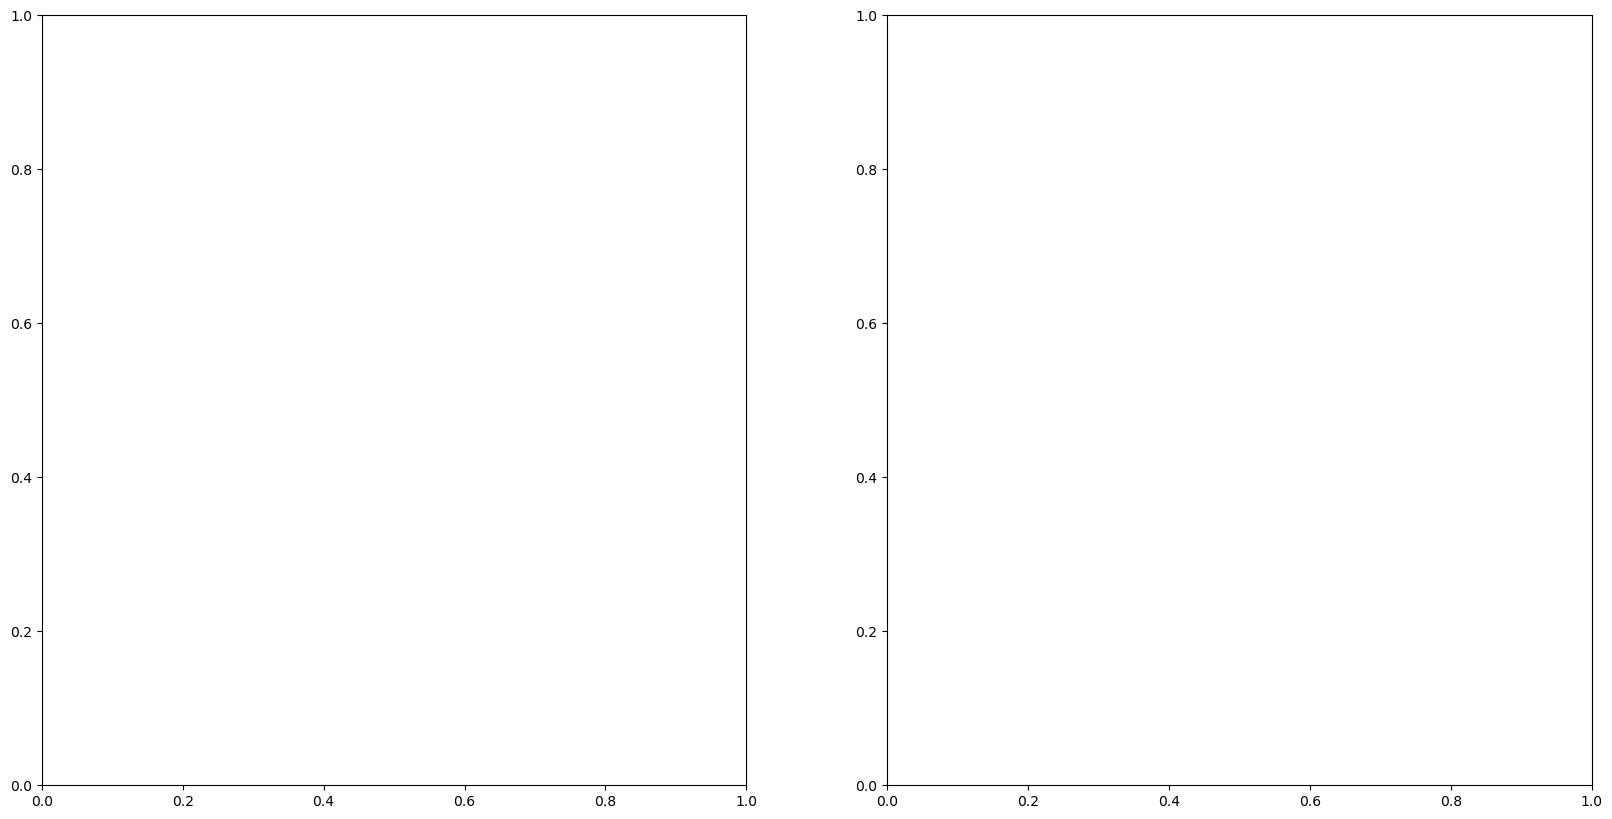

In [76]:
# compare predicted and actual values
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].scatter(range(y_pred_rfr.shape[0]), y_pred_rfr, c="red")
axs[0].scatter(range(y_pred_rfr.shape[0]), y_test, c="blue")
axs[0].set_title("Random Forest Regression")
axs[1].scatter(range(y_pred_mlp.shape[0]), y_pred_mlp, c="red")
axs[1].scatter(range(y_pred_mlp.shape[0]), y_test, c="blue")
axs[1].set_title("MLP Regression")
plt.show()

In [77]:
# residual plot
residuals_rfr = y_test - y_pred_rfr
residuals_mlp = y_test - y_pred_mlp
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Residual plot')
axs[0].scatter(y_pred_rfr, residuals_rfr, color='blue')
axs[0].set_title("Random Forest Regression")
axs[1].scatter(y_pred_mlp, residuals_mlp, color='blue')
axs[1].set_title("MLP Regression")
for i in range(2):
    axs[i].axhline(y=0, color='black', linestyle='--')
    axs[i].set_xlabel('predicted values')
    axs[i].set_ylabel('residuals')
plt.show()

NameError: name 'y_pred_rfr' is not defined

NameError: name 'y_pred_rfr' is not defined

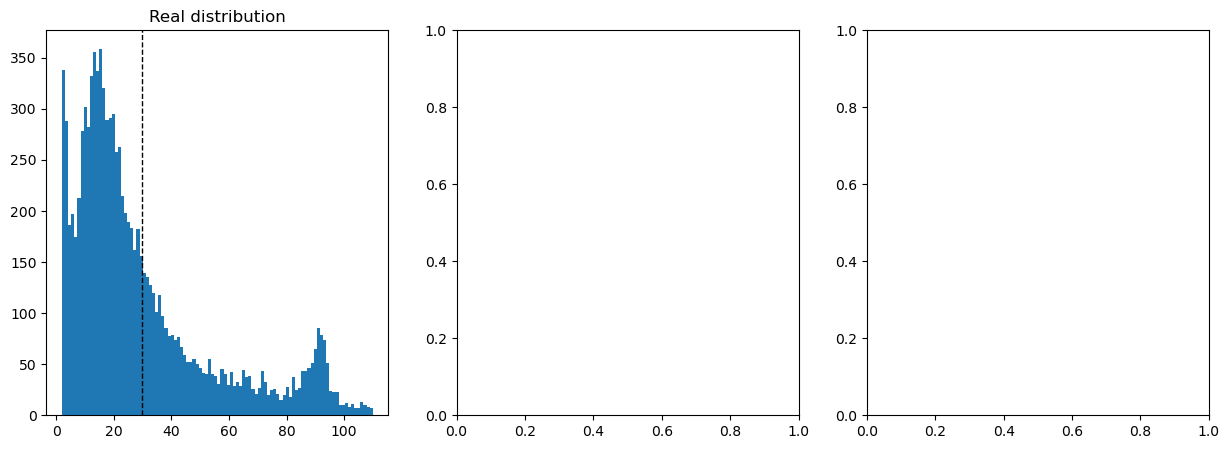

In [78]:
# show distribution of predicted and actual values
fig, axs = plt.subplots(1, 3, figsize = (15,5))
axs[0].hist(y_test, bins=100)
axs[0].axvline(y_test.mean(), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Real distribution')
axs[1].hist(y_pred_rfr, bins=100)
axs[1].axvline(y_pred_rfr.mean(), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Random Forest Regression')
axs[2].hist(y_pred_mlp, bins=100)
axs[2].axvline(y_pred_mlp.mean(), color='k', linestyle='dashed', linewidth=1)
axs[2].set_title('MLP Regression')
for i in range(3):
    axs[i].set_xlabel('M')
    axs[i].set_ylabel('Frequency')
plt.show()       

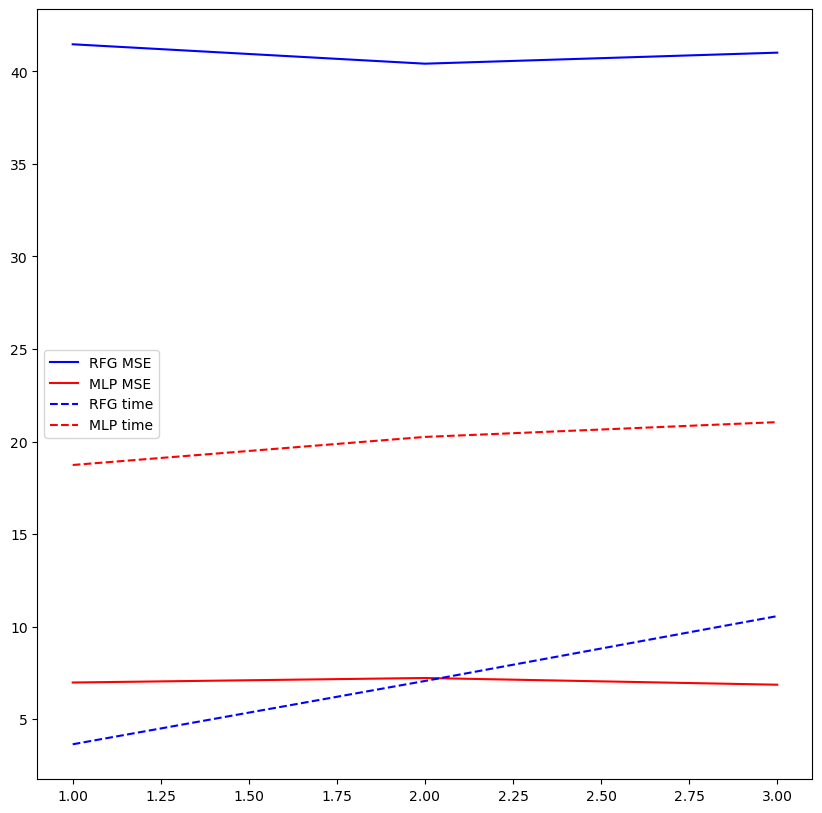

In [80]:
mse_rfr = []
time_rfr = []
mse_mlp = []
time_mlp = []
for i in range(1,4):
    RFR = RandomForestRegressor(n_estimators=50*i)
    start = time.time()
    RFR.fit(X_val_std, y_val)
    end = time.time()
    time_rfr.append(end-start)
    y_pred_rfr = RFR.predict(X_test_std)
    mse_rfr.append(mean_squared_error(y_test, y_pred_rfr))
    MLP = MLPRegressor(activation='relu', hidden_layer_sizes=300, max_iter=500 + i*50, solver='lbfgs' )
    start = time.time()
    MLP.fit(X_val_std, y_val)
    end = time.time()
    time_mlp.append(end-start)
    y_pred_mlp = MLP.predict(X_test_std)
    mse_mlp.append(mean_squared_error(y_test, y_pred_mlp))

plt.figure(figsize=(10,10))
plt.plot(np.arange(1,4), mse_rfr, color='blue', label='RFG MSE')
plt.plot(np.arange(1,4), mse_mlp, color='red', label='MLP MSE')
plt.plot(np.arange(1,4), time_rfr, color='blue', linestyle='--', label='RFG time')
plt.plot(np.arange(1,4), time_mlp, color='red', linestyle='--', label='MLP time')
plt.legend()
plt.show()


In [ ]:
# Decision Tree Regression
clf = tree.DecisionTreeRegressor()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_train_std)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
y_pred = clf.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train_std, y_train)
clf = LinearRegression(fit_intercept=False)
clf.fit(X_poly, y_train)
y_pred = clf.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)
#y_pred = clf.predict(X_poly)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse
figure = plt.figure(figsize=(20,20))
plt.scatter(range(y_pred.shape[0]), y_pred, c="red")
plt.scatter(range(y_train.shape[0]), y_train, c="blue")
plt.show()

In [ ]:
# show distribution of predicted and actual values
fig, axs = plt.subplots(1, 2, figsize = (15,5))
axs[0].hist(y_pred, bins=100)
axs[0].axvline(y_pred.mean(), color='k', linestyle='dashed', linewidth=1)
axs[1].hist(y_test, bins=100)
axs[1].axvline(y_test.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()  